In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.integrate import solve_ivp
from scipy import fftpack
from sklearn.metrics import mean_squared_error
from fractions import Fraction

# Problem 1: Numerical integration of the SIR model

In [36]:
def SIR(t, Z, beta, gamma):
    S, I, R = Z
    fraction_of_suseptible = -beta * S * I
    fraction_of_infected = beta * S * I - gamma * I
    fraction_of_recovering = gamma * I
    return [fraction_of_suseptible, fraction_of_infected, fraction_of_recovering]

$$
\begin{align}
\frac{dS}{dt} &= -\beta S I, \\
\frac{dI}{dt} &= \beta S I - \gamma I, \\
\frac{dR}{dt} &= \gamma I,
\end{align}
$$

In [37]:
S0 = 0.99
I0 = 0.01
R0 = 0.0
y0 = [S0, I0, R0]

max_time = 356 # in days
STEPS = 1000
t_span = np.linspace(0, max_time, STEPS)

/tmp/ipykernel_15063/2734573116.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axs[i].plot(initial_condition_S, initial_condition_I, 'k--', color='black', marker='o')
/tmp/ipykernel_15063/2734573116.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axs[i].plot(end_condition_S, end_condition_I, 'k--', color='black', marker='o')
/tmp/ipykernel_15063/2734573116.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[i].legend()


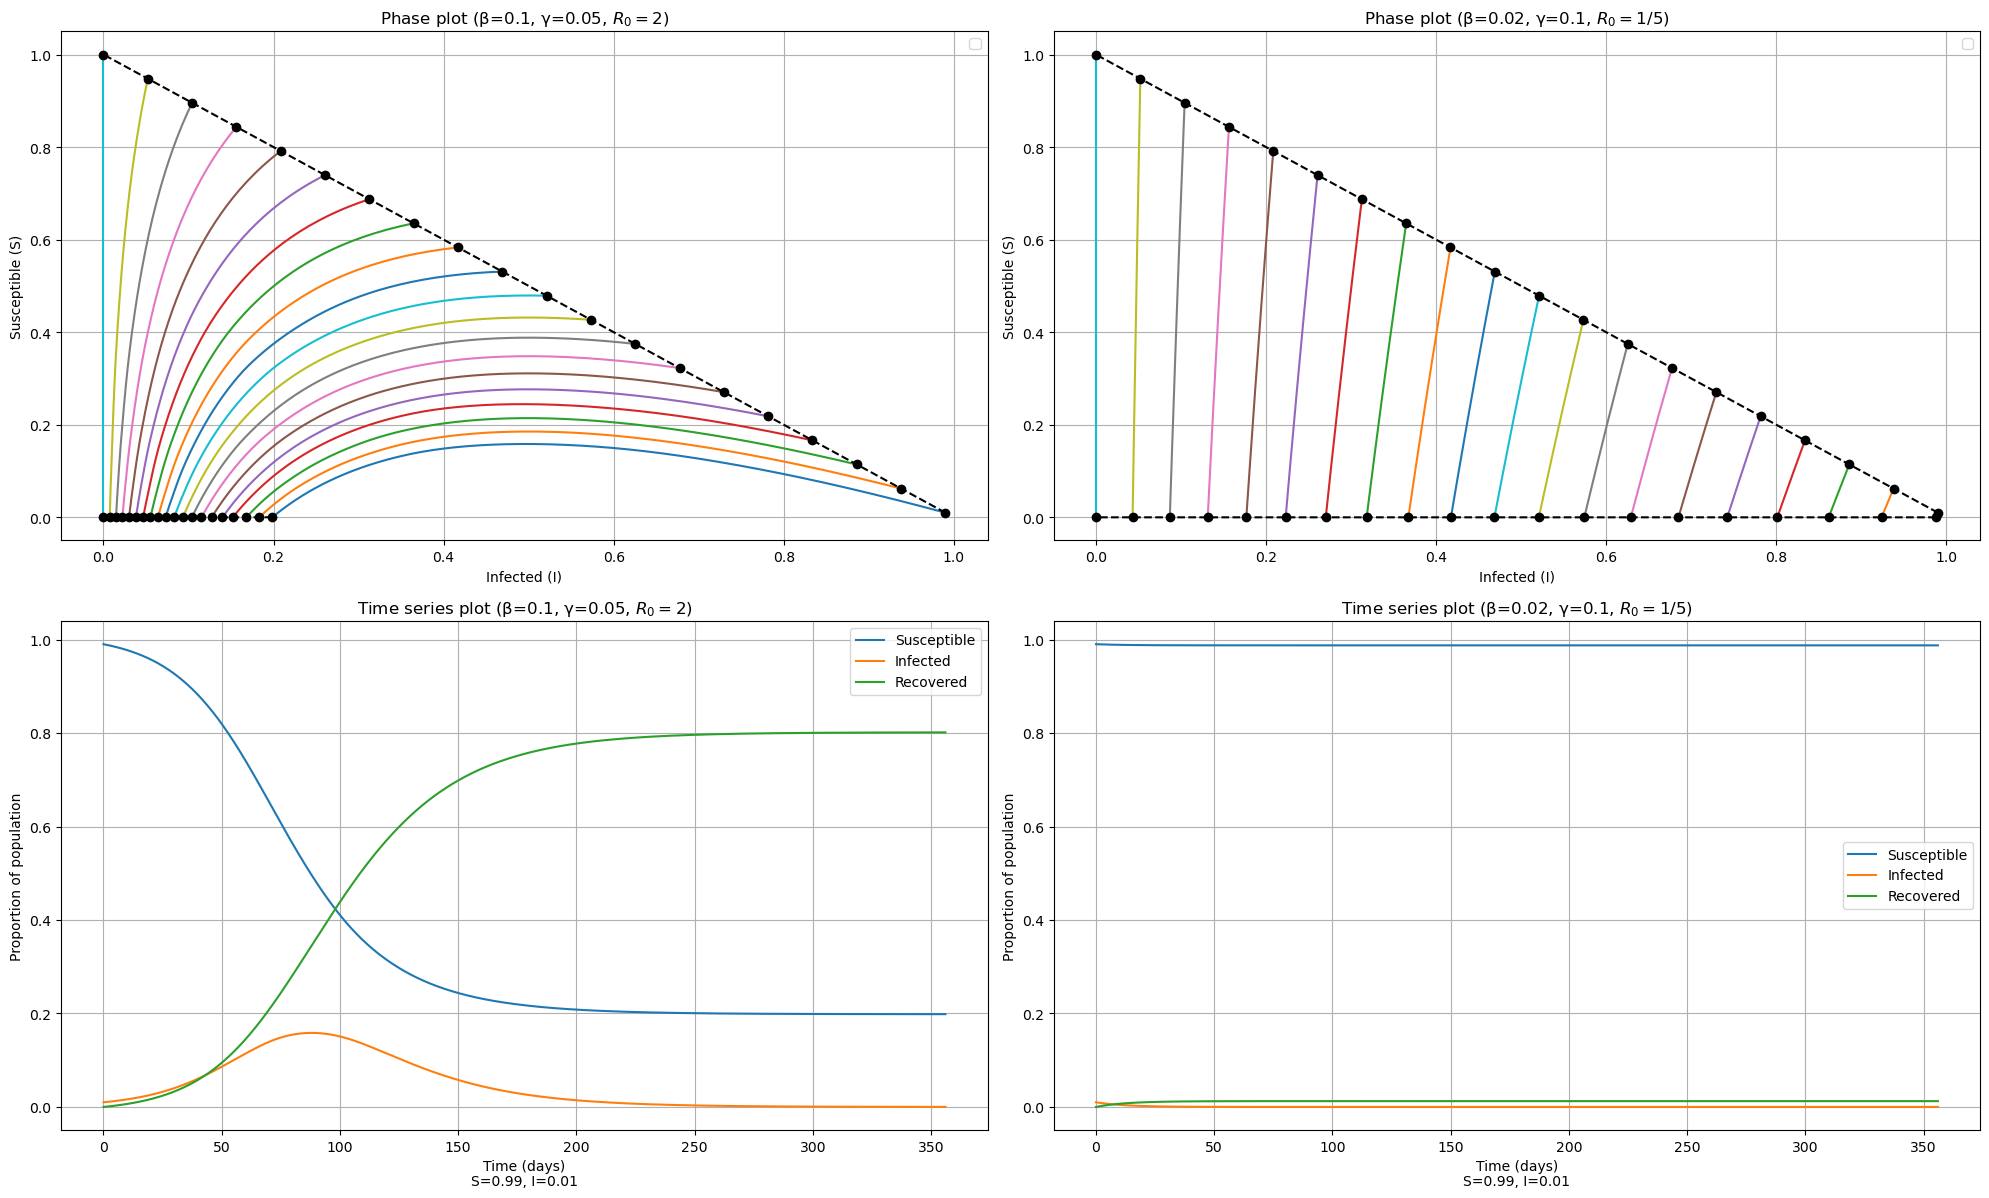

In [38]:
values = [(0.1, 0.05), (0.02, 0.1)]
fig, axs = plt.subplots(2, len(values), figsize=(20, 12))
axs = axs.ravel()

for i, (beta, gamma) in enumerate(values):
    sol = solve_ivp(SIR, [0, max_time], y0, args=(beta, gamma), t_eval=t_span, dense_output=True)
    S, I, R = sol.sol(t_span)

    # Phase plots
    initial_condition_S = []
    initial_condition_I = []
    end_condition_S = []
    end_condition_I = []
    for I0 in np.linspace(0.01, 1, 20):
        S0 = 1 - I0 - R0
        y0_phase = [S0, I0, R0]
        sol_phase = solve_ivp(SIR, [0, max_time], y0_phase, args=(beta, gamma), t_eval=t_span, dense_output=True)
        S_phase, I_phase, _ = sol_phase.sol(t_span)
        axs[i].plot(S_phase, I_phase)
        
        initial_condition_S.append(S_phase[0])
        initial_condition_I.append(I_phase[0])
        end_condition_S.append(S_phase[-1])
        end_condition_I.append(I_phase[-1])

    axs[i].plot(initial_condition_S, initial_condition_I, 'k--', color='black', marker='o')
    axs[i].plot(end_condition_S, end_condition_I, 'k--', color='black', marker='o')
    axs[i].set_xlabel("Infected (I)")
    axs[i].set_ylabel("Susceptible (S)")
    axs[i].set_title((f"Phase plot (β={beta}, γ={gamma}, $R_0={Fraction(beta/gamma).limit_denominator()}$)"))
    axs[i].legend()
    axs[i].grid(True)

    # Time series plots
    axs[i + len(values)].plot(t_span, S, label="Susceptible")
    axs[i + len(values)].plot(t_span, I, label="Infected")
    axs[i + len(values)].plot(t_span, R, label="Recovered")
    axs[i + len(values)].set_xlabel("Time (days)")
    axs[i + len(values)].set_ylabel("Proportion of population")
    axs[i + len(values)].set_title(f"Time series plot (β={beta}, γ={gamma}, $R_0={Fraction(beta/gamma).limit_denominator()}$)")
    axs[i + len(values)].text(0.5, -0.1, f"S={y0[0]}, I={y0[1]}", ha='center', va='center', transform=axs[i + len(values)].transAxes)
    axs[i + len(values)].legend()
    axs[i + len(values)].grid(True)


plt.tight_layout()
plt.show()


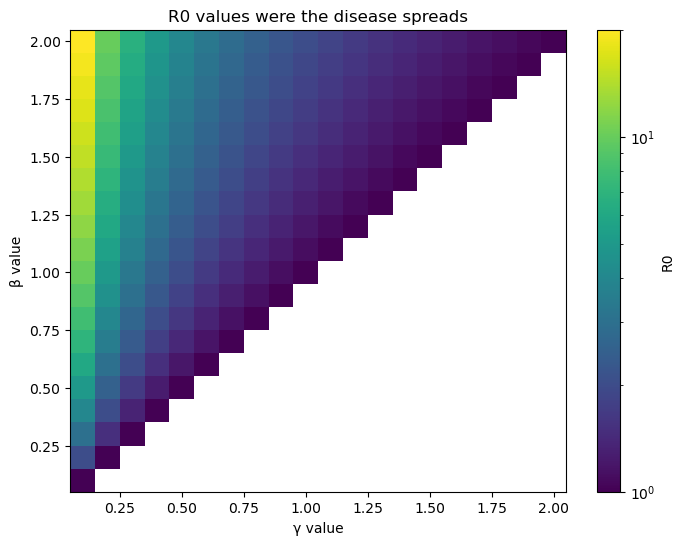

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

beta_values = np.arange(0.1, 2.1, 0.1)
gamma_values = np.arange(0.1, 2.1, 0.1)

R0_values = np.zeros((len(beta_values), len(gamma_values)))

for i, beta in enumerate(beta_values):
    for j, gamma in enumerate(gamma_values):
        R0_values[i, j] = beta / gamma

masked_R0_values = np.ma.masked_where(R0_values < 1, R0_values)

fig, ax = plt.subplots(figsize=(8, 6))
c = ax.pcolormesh(gamma_values, beta_values, masked_R0_values, shading='auto', cmap='viridis', norm=LogNorm(vmin=masked_R0_values.min(), vmax=masked_R0_values.max()))
ax.set_xlabel('γ value')
ax.set_ylabel('β value')
ax.set_title('R0 values were the disease spreads')
fig.colorbar(c, ax=ax, label='R0')

plt.show()

-------------------------

In [66]:
N = 763
init_infected = 1
I0 = init_infected / N
S0 = (N - init_infected) / N
R0 = 0.0
y0 = [S0, I0, R0]

days = 14
t_span = np.arange(0, days + 1)

target = np.array([1, 3, 8, 28, 75, 221, 291, 255, 235, 190, 125, 70, 28, 12, 5])

INFECTED = 1
y0

[0.9986893840104849, 0.001310615989515072, 0.0]

In [41]:
MAX_BETA = 2.00
MAX_GAMMA = 2.00

beta_range = np.arange(0, MAX_BETA, 0.01)
gamma_range = np.arange(0, MAX_GAMMA, 0.01)

best_beta, best_gamma = 0.0, 0.0
lowest_error = float('inf')
error_matrix = np.zeros((len(beta_range), len(gamma_range)))

for i, beta in enumerate(beta_range):
    for j, gamma in enumerate(gamma_range):
        sol = solve_ivp(SIR, (0, days), y0, args=(beta, gamma), dense_output=True)
        output = sol.sol(t_span)[INFECTED]

        error = mean_squared_error(output * N, target)
        error_matrix[i][j] = error
        if error < lowest_error:
            lowest_error = error
            best_beta, best_gamma = beta, gamma


print(f"Best parameters: β = {best_beta:.2f}, γ = {best_gamma:.2f}")
print(f"Lowest loss: {lowest_error:.2f}")

Best parameters: β = 1.67, γ = 0.45
Lowest loss: 270.06


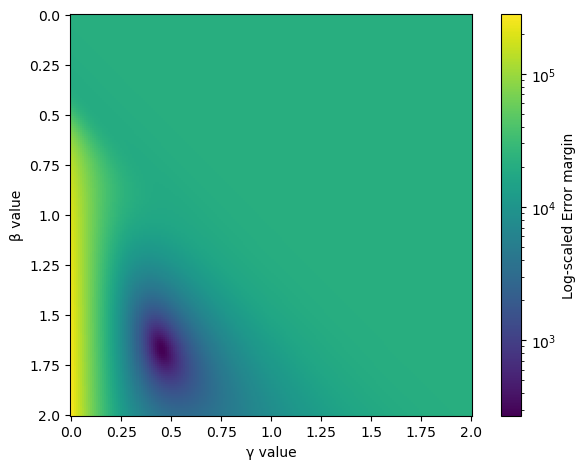

In [42]:
AXIS_POINTS = 9
plt.imshow(error_matrix, cmap='viridis', norm=LogNorm(), interpolation='nearest')

x_ticks = np.linspace(0, error_matrix.shape[1]-1, AXIS_POINTS)
y_ticks = np.linspace(0, error_matrix.shape[0]-1, AXIS_POINTS)
plt.xticks(x_ticks, np.round(np.linspace(0, MAX_BETA, AXIS_POINTS), 2)) 
plt.yticks(y_ticks, np.round(np.linspace(0, MAX_GAMMA, AXIS_POINTS), 2)) 

plt.colorbar(label='Log-scaled Error margin')
plt.xlabel('γ value')
plt.ylabel('β value')
plt.tight_layout()
plt.show()

[0.00131062 0.00441699 0.01467824 0.04666409 0.13014353 0.27152079
 0.37108201 0.35934332 0.2888771  0.21196458 0.14923911 0.1025976
 0.06967865 0.04699195 0.03157322]


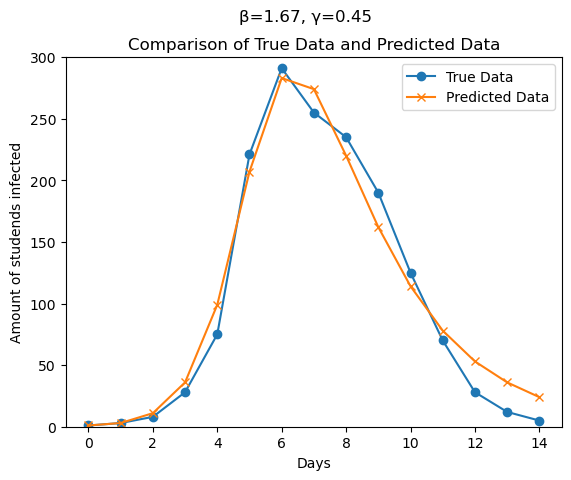

In [43]:
sol = solve_ivp(SIR, (0, 14), y0, args=(best_beta, best_gamma), dense_output=True)
I = sol.sol(t_span)[INFECTED]
print(I)
I = I * N
I = np.round(I)

y_min = 0
y_max = 300

x = columns=np.arange(0, max_time + 1)
plt.plot(t_span, target, marker='o', label='True Data')
plt.plot(t_span, I, marker='x', label='Predicted Data')
plt.xlabel('Days')
plt.ylabel('Amount of studends infected')
plt.title('Comparison of True Data and Predicted Data')
plt.suptitle(f'β={best_beta}, γ={best_gamma}')
plt.ylim(y_min, y_max)
plt.legend()

-------------------------------

In [44]:
def SIRV(t, Z, beta, gamma, v):
    S, I, R, V = Z
    fraction_of_suseptible = -(beta * I * S) - v * S
    fraction_of_infected = (beta * I * S) - gamma * I
    fraction_of_recovering = gamma * I
    fraction_of_vacinated = v * S
    return [fraction_of_suseptible, fraction_of_infected, fraction_of_recovering, fraction_of_vacinated]

\begin{align}
    \frac{dS}{dt} &= - \beta I S - v S, \\
    \frac{dI}{dt} &= \beta I S - \gamma I, \\
    \frac{dR}{dt} &= \gamma I, \\
    \frac{dV}{dt} &= v S.
\end{align}


In [45]:
N = 763
init_infected = 1
I0 = init_infected / N
S0 = (N - init_infected) / N
R0 = 0.0
V0 = 0.0
y_without = [S0, I0, R0]
y_with = [S0, I0, R0, V0]

beta = 1.67
gamma = 0.47
v = 0.1

days = 14
t_span = np.arange(0, days, 0.01)

sol_without = solve_ivp(SIR, (0, days), y_without, args=(beta, gamma), t_eval=t_span, dense_output=True)
sol_with = solve_ivp(SIRV, (0, days), y_with, args=(beta, gamma, v), t_eval=t_span, dense_output=True)

S_without, I_without, R_without = sol_without.sol(t_span)
S_with, I_with, R_with, V_with = sol_with.sol(t_span)

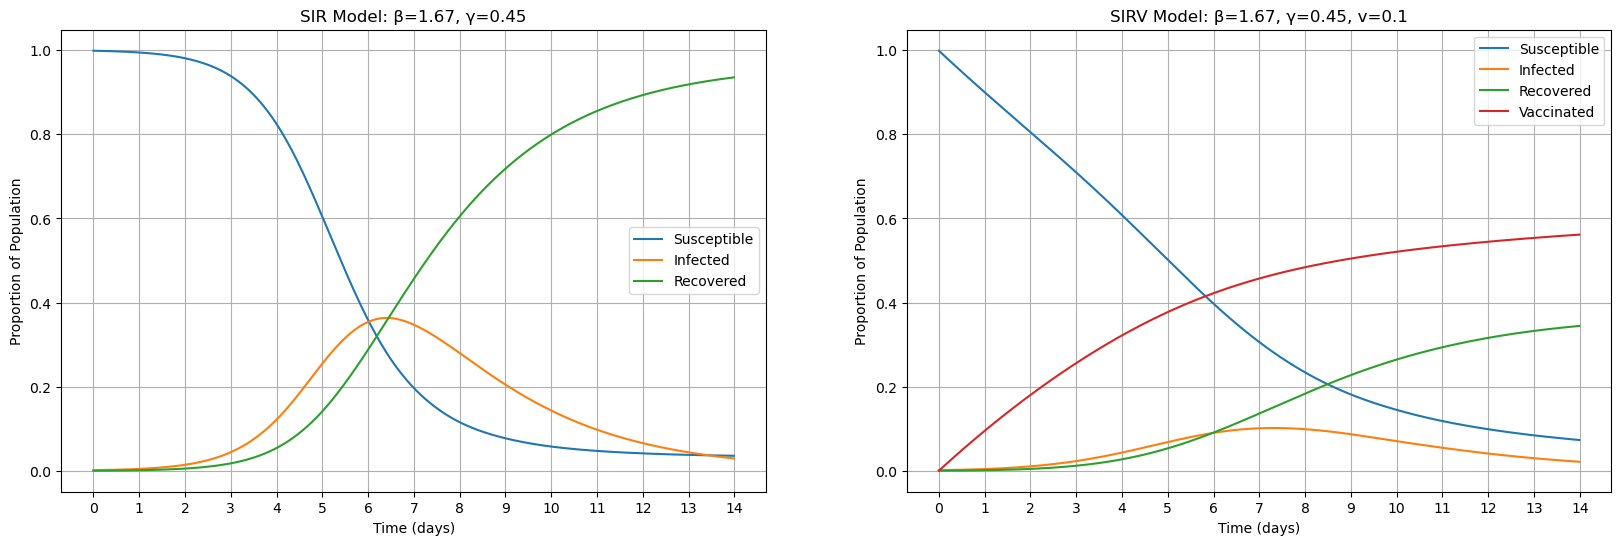

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

ax1.plot(t_span, S_without, label='Susceptible')
ax1.plot(t_span, I_without, label='Infected')
ax1.plot(t_span, R_without, label='Recovered')
ax1.set_xlabel('Time (days)')
ax1.set_xticks(np.arange(0, days + 1, 1))
ax1.set_ylabel('Proportion of Population')
ax1.set_title(f'SIR Model: β={best_beta}, γ={best_gamma}')
ax1.legend()
ax1.grid()

ax2.plot(t_span, S_with, label='Susceptible')
ax2.plot(t_span, I_with, label='Infected')
ax2.plot(t_span, R_with, label='Recovered')
ax2.plot(t_span, V_with, label='Vaccinated')
ax2.set_xlabel('Time (days)')
ax2.set_xticks(np.arange(0, days + 1, 1))
ax2.set_ylabel('Proportion of Population')
ax2.set_title(f'SIRV Model: β={best_beta}, γ={best_gamma}, v={v}')
ax2.legend()
ax2.grid()

plt.show()

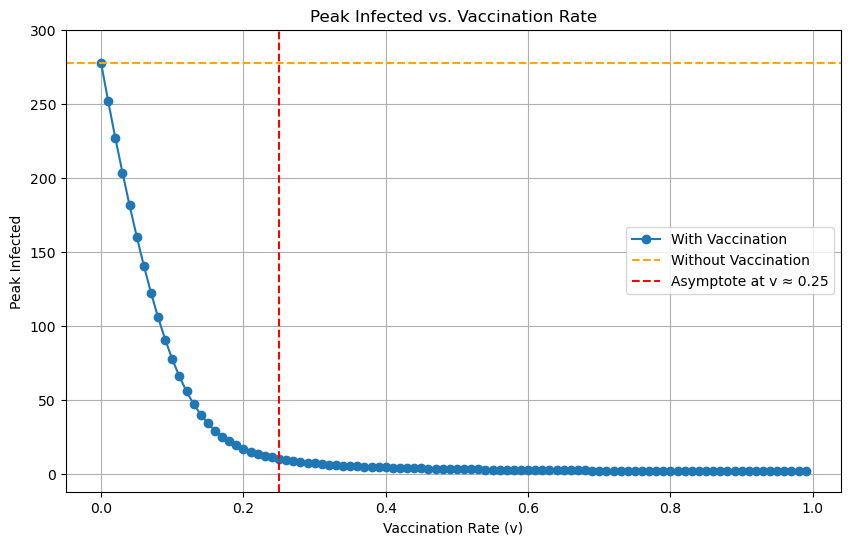

In [47]:
beta = 1.67
gamma = 0.47
v_values = np.arange(0, 1, 0.01)
days = 14
t_span = np.arange(0, days, 0.01)

peak_value_without = np.max(solve_ivp(SIR, (0, days), y_without, args=(beta, gamma), t_eval=t_span, dense_output=True).sol(t_span)[1]) * N
peak_values_with = {v: np.max(solve_ivp(SIRV, (0, days), y_with, args=(beta, gamma, v), t_eval=t_span, dense_output=True).sol(t_span)[1]) * N for v in v_values}

values = list(peak_values_with.values())
keys = list(peak_values_with.keys())
is_close = np.isclose(values, np.roll(values, shift=1), atol=1)
asymptote_index = np.argmax(is_close)
asymptote_v = keys[asymptote_index]

plt.figure(figsize=(10, 6))
plt.plot(v_values, list(peak_values_with.values()), label='With Vaccination', marker='o')
plt.axhline(y=peak_value_without, color='orange', linestyle='--', label='Without Vaccination')
plt.axvline(x=asymptote_v, color='red', linestyle='--', label=f'Asymptote at v ≈ {asymptote_v:.2f}')
plt.xlabel('Vaccination Rate (v)')
plt.ylabel('Peak Infected')
plt.ylim(top=300)
plt.title('Peak Infected vs. Vaccination Rate')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
N = 763
init_infected = 1
vacinated_fraction = 0.25
init_vacinated = N * vacinated_fraction
I0 = init_infected / N
V0 = init_vacinated / N
R0 = 0.0
S0_vac = 1 - (I0 + V0 + R0)
S0 = 1 - (I0 + R0)
y_without = [S0, I0, R0]
y_with = [S0_vac, I0, R0, V0]

beta = 1.67
gamma = 0.47
v = 0.0

days = 14
t_span = np.arange(0, days, 0.01)

sol_without = solve_ivp(SIR, (0, days), y_without, args=(beta, gamma), t_eval=t_span, dense_output=True)
sol_with = solve_ivp(SIRV, (0, days), y_with, args=(beta, gamma, v), t_eval=t_span, dense_output=True)

S_without, I_without, R_without = sol_without.sol(t_span)
S_with, I_with, R_with, V_with = sol_with.sol(t_span)

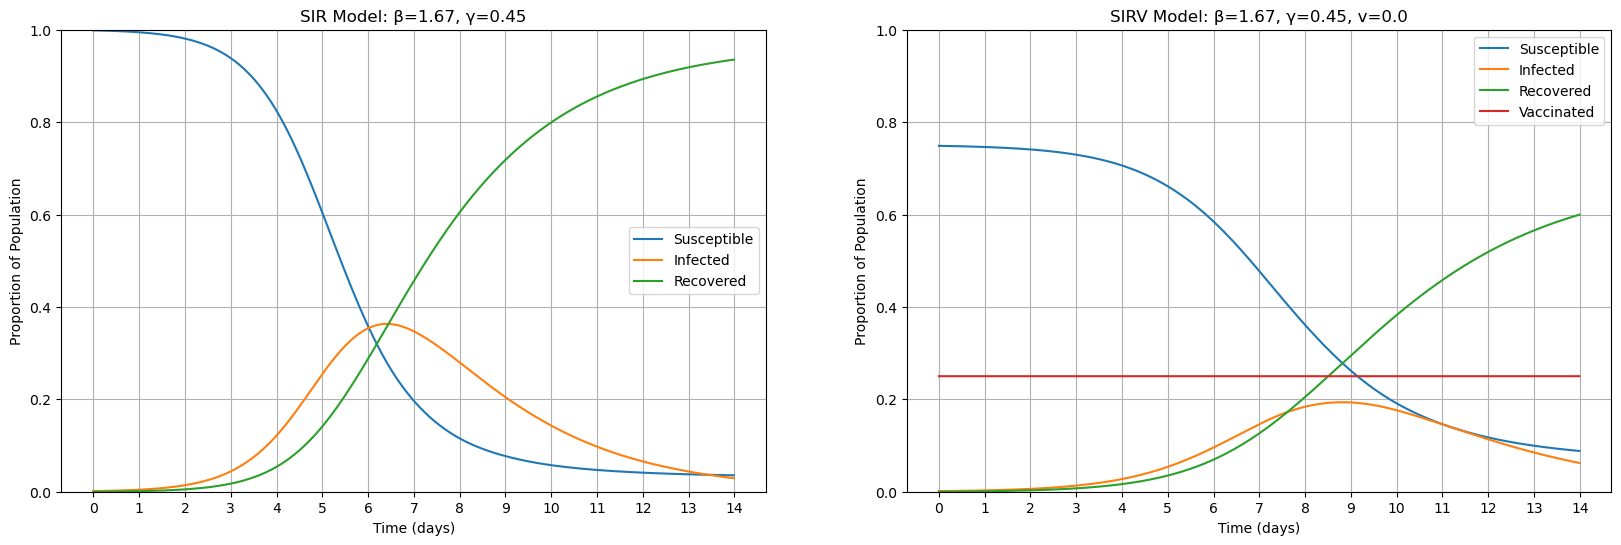

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

ax1.plot(t_span, S_without, label='Susceptible')
ax1.plot(t_span, I_without, label='Infected')
ax1.plot(t_span, R_without, label='Recovered')
ax1.set_xlabel('Time (days)')
ax1.set_xticks(np.arange(0, days + 1, 1))
ax1.set_ylabel('Proportion of Population')
ax1.set_ylim(0, 1)
ax1.set_title(f'SIR Model: β={best_beta}, γ={best_gamma}')
ax1.legend()
ax1.grid()

ax2.plot(t_span, S_with, label='Susceptible')
ax2.plot(t_span, I_with, label='Infected')
ax2.plot(t_span, R_with, label='Recovered')
ax2.plot(t_span, V_with, label='Vaccinated')
ax2.set_xlabel('Time (days)')
ax2.set_xticks(np.arange(0, days + 1, 1))
ax2.set_ylabel('Proportion of Population')
ax2.set_ylim(0, 1)
ax2.set_title(f'SIRV Model: β={best_beta}, γ={best_gamma}, v={v}')
ax2.legend()
ax2.grid()

plt.show()

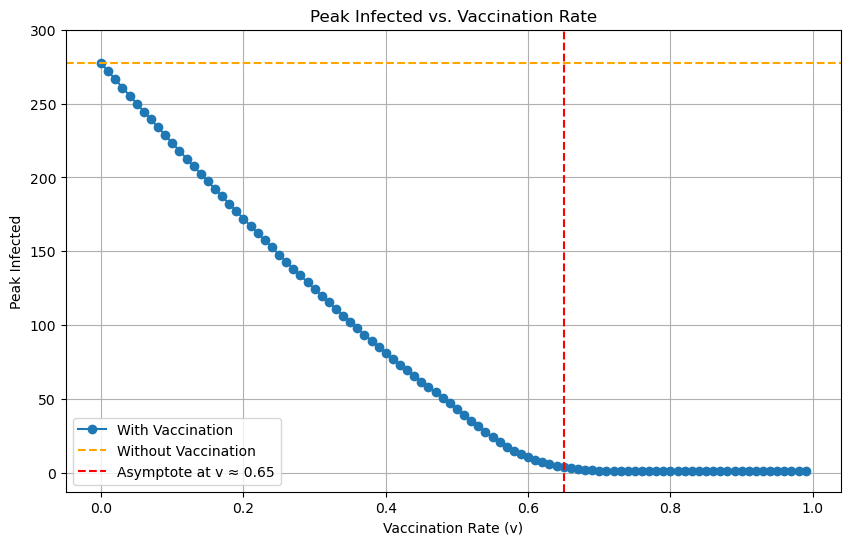

In [50]:
beta = 1.67
gamma = 0.47
v = 0.00
init_vacinated = np.arange(0, 1, 0.01)
days = 14
t_span = np.arange(0, days, 0.01)

peak_value_without = np.max(solve_ivp(SIR, (0, days), y_without, args=(beta, gamma), t_eval=t_span, dense_output=True).sol(t_span)[1]) * N
peak_values_with = {V0: np.max(solve_ivp(SIRV, (0, days), [1 - (I0 + V0 + R0), I0, R0, V0], args=(beta, gamma, v), t_eval=t_span, dense_output=True).sol(t_span)[1]) * N for V0 in init_vacinated}

    
values = list(peak_values_with.values())
keys = list(peak_values_with.keys())
is_close = np.isclose(values, np.roll(values, shift=1), atol=1)
asymptote_index = np.argmax(is_close)
asymptote_v = keys[asymptote_index]

plt.figure(figsize=(10, 6))
plt.plot(v_values, list(peak_values_with.values()), label='With Vaccination', marker='o')
plt.axhline(y=peak_value_without, color='orange', linestyle='--', label='Without Vaccination')
plt.axvline(x=asymptote_v, color='red', linestyle='--', label=f'Asymptote at v ≈ {asymptote_v:.2f}')
plt.xlabel('Vaccination Rate (v)')
plt.ylabel('Peak Infected')
plt.ylim(top=300)
plt.title('Peak Infected vs. Vaccination Rate')
plt.legend()
plt.grid(True)
plt.show()

--------------------------
# Problem 2: Demography


In [51]:
def SIR_demographic(t, Z, beta, gamma, mu):
    S, I, R = Z
    fraction_of_suseptible = mu - beta * S * I - mu * S
    fraction_of_infected = beta * S * I - gamma * I - mu * I
    fraction_of_recovering = gamma * I - mu * R
    return [fraction_of_suseptible, fraction_of_infected, fraction_of_recovering]

\begin{align}
\text{Whereby}\; \mu = \text{birth rate} \\
\frac{dS}{dt} &= \mu -\beta S I - \mu S, \\
\frac{dI}{dt} &= +\beta S I - \gamma I - \mu I, \\
\frac{dR}{dt} &= +\gamma I - \mu R. \\
\end{align}

In [52]:
N = 763
init_infected = 1
I0 = init_infected / N
R0 = 0.0
S0 = 1 - (I0 + R0)
y = [S0, I0, R0]

beta = 1.67
gamma = 0.47
mu = Fraction(1, 100)

days = 200
t_span = np.arange(0, days, 1)

sol = solve_ivp(SIR_demographic, (0, days), y, args=(beta, gamma, mu), dense_output=True)

S, I, R = sol.sol(t_span)

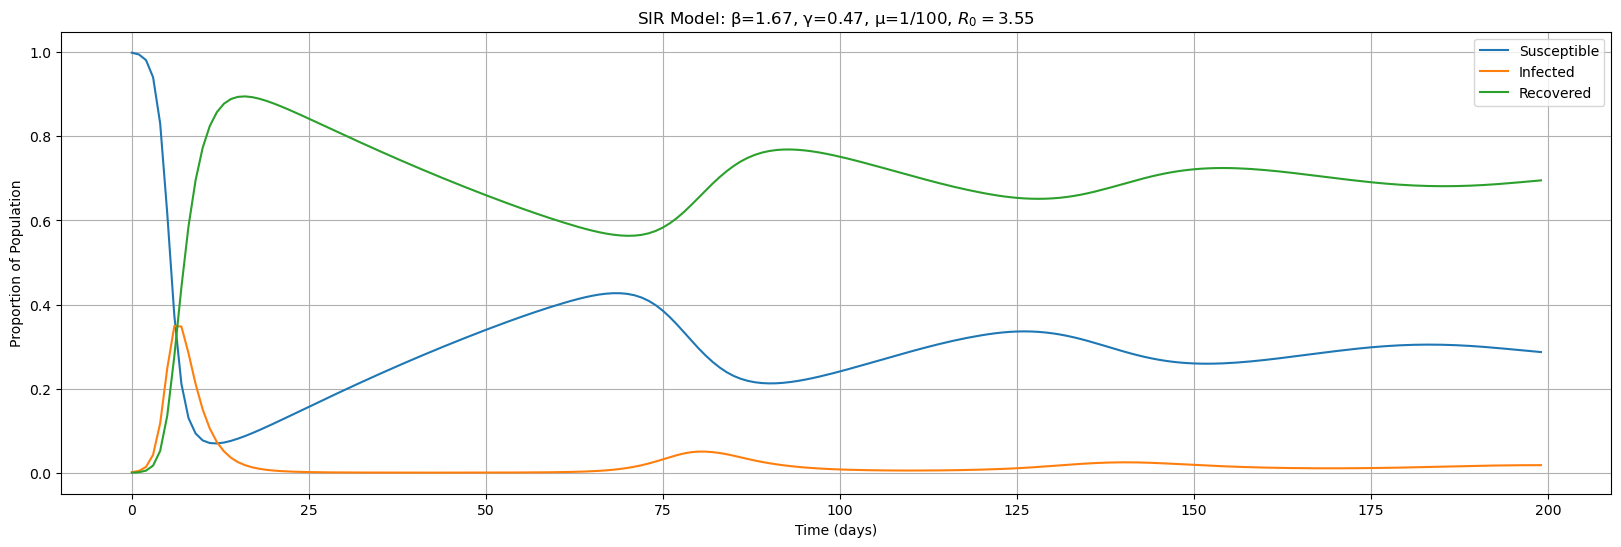

In [53]:
fig, ax = plt.subplots(figsize=(20, 6))

ax.plot(t_span, S, label='Susceptible')
ax.plot(t_span, I, label='Infected')
ax.plot(t_span, R, label='Recovered')
ax.set_xlabel('Time (days)')
# ax.set_xticks(np.linspace(0,days, 16))
ax.set_ylabel('Proportion of Population')
ax.set_title(f'SIR Model: β={beta}, γ={gamma}, μ={mu}, $R_0={round(beta/gamma,2)}$')
ax.legend()
ax.grid()

plt.show()

In [54]:
print(type(S))

<class 'numpy.ndarray'>


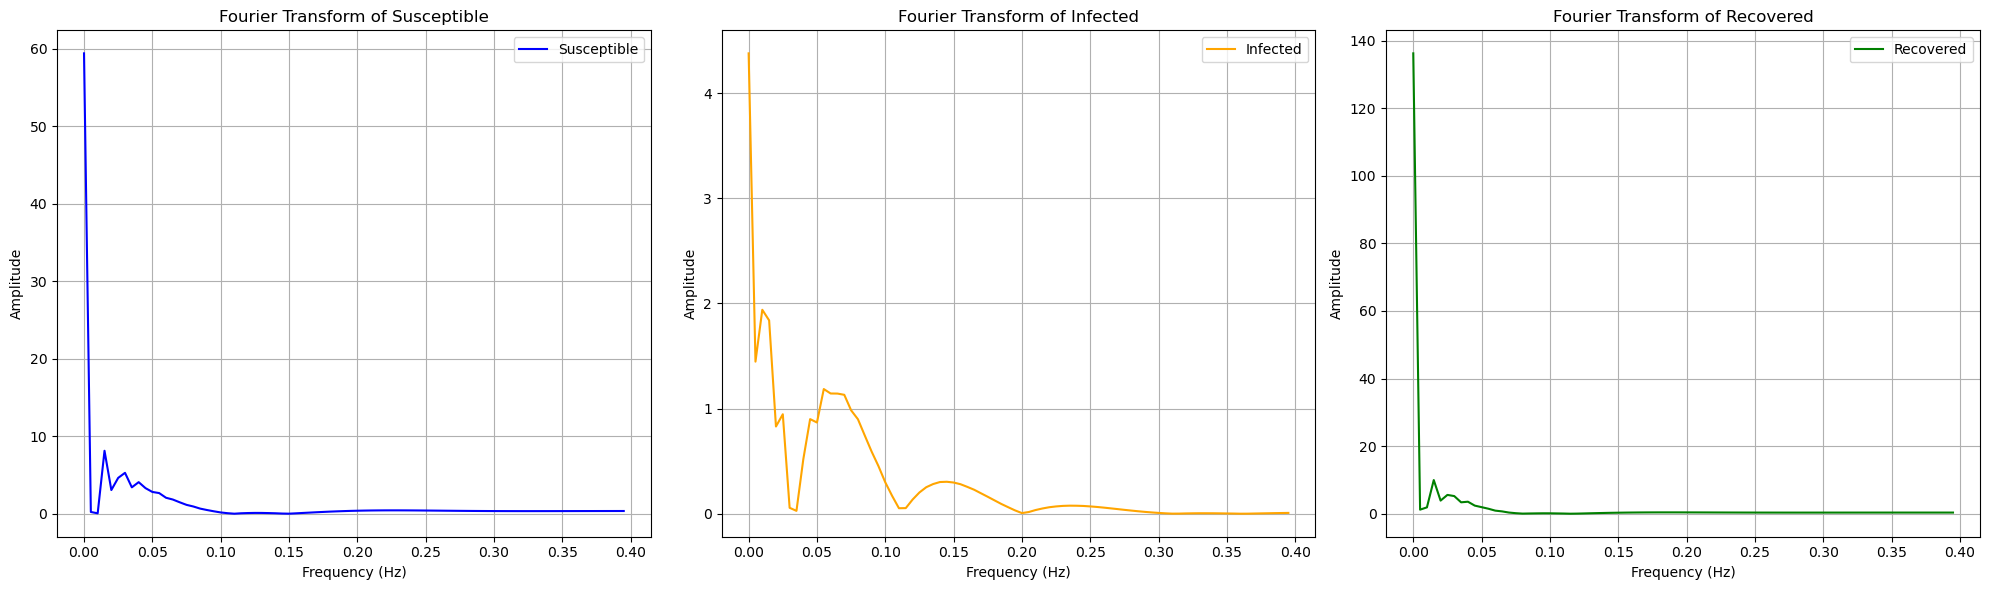

In [55]:
def fourier(ax, data, name, x_max=0.4):
    compartment, colour = data
    fourier = fftpack.fft(compartment)
    freqs = fftpack.fftfreq(len(compartment))


    freqs, fourier = zip(*sorted(zip(freqs, fourier)))
    i_min = freqs.index(0)
    i_max = freqs.index(x_max)

    ax.plot(freqs[i_min:i_max], np.abs(np.real(fourier))[i_min:i_max], label=f'{name}', color=colour)
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitude')
    ax.set_title(f'Fourier Transform of {name}')
    ax.grid(True)
    ax.legend(loc='upper right')

data_list = {"Susceptible": (S, "blue"), "Infected": (I, "orange"), "Recovered": (R, "green")}
n_plots = len(data_list)

fig, axs = plt.subplots(1, n_plots, figsize=(20, 6))

for ax, (key, compartment) in zip(axs, data_list.items()):
    fourier(ax, compartment, name=key)

plt.tight_layout()
plt.show()

-------------------

In [56]:
def SIR_demographic_death(t, Z, beta, gamma, mu, nu):
    S, I, R, D = Z
    fraction_of_suseptible = mu - beta * S * I - mu * S
    fraction_of_infected = beta * S * I - gamma * I - mu * I - nu * I
    fraction_of_recovering = gamma * I - mu * R
    fraction_of_infected_mortality = nu * I
    return [fraction_of_suseptible, fraction_of_infected, fraction_of_recovering, fraction_of_infected_mortality]

\begin{align}
\text{Whereby}\; \mu = \text{birth rate and} \; \nu = \text{infected mortality} \\
\frac{dS}{dt} &= \mu -\beta S I - \mu S, \\
\frac{dI}{dt} &= +\beta S I - \gamma I - \mu I - \nu I, \\
\frac{dR}{dt} &= +\gamma I - \mu R. \\
\end{align}

In [57]:
N = 763
init_infected = 1
I0 = init_infected / N
R0 = 0.0
S0 = 1 - (I0 + R0)
D0 = 0.0
y = [S0, I0, R0, D0]

beta = 1.67
gamma = 0.47
mu = Fraction(1, 100)
nu = Fraction(1, 50)

days = 200
t_span = np.arange(0, days, 1)

sol = solve_ivp(SIR_demographic_death, (0, days), y, args=(beta, gamma, mu, nu), dense_output=True)

S, I, R, D = sol.sol(t_span)

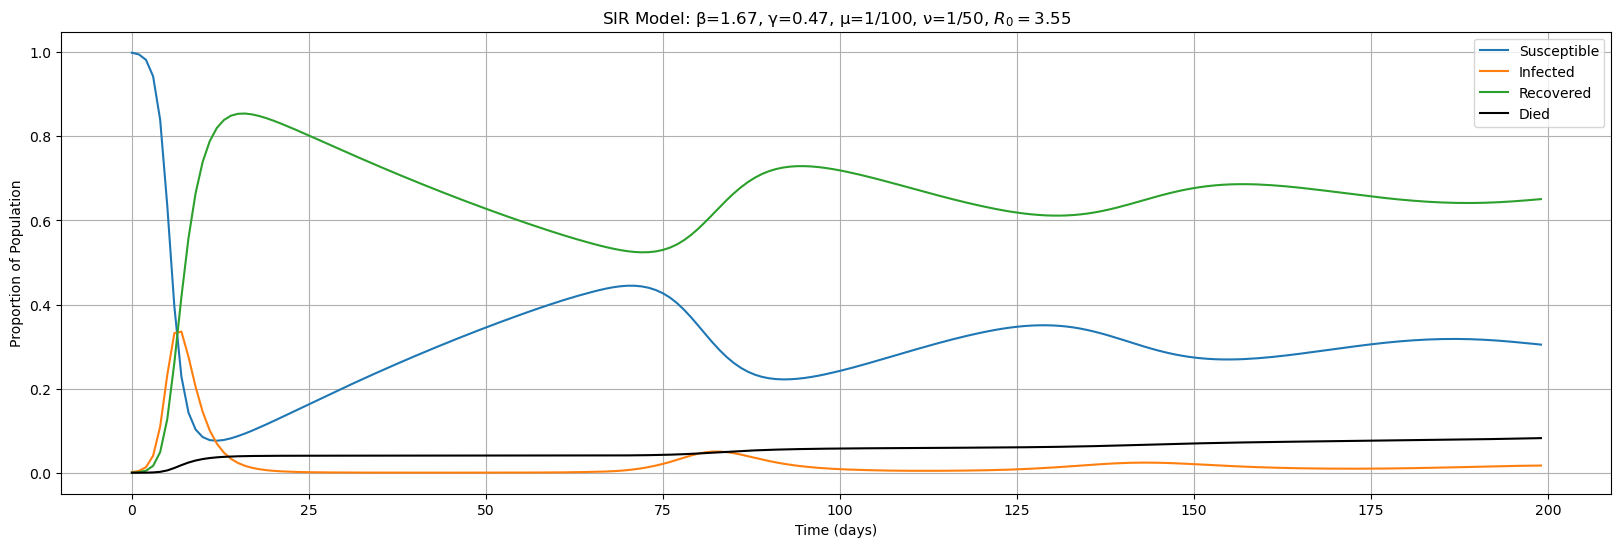

In [58]:
fig, ax = plt.subplots(figsize=(20, 6))

ax.plot(t_span, S, label='Susceptible')
ax.plot(t_span, I, label='Infected')
ax.plot(t_span, R, label='Recovered')
ax.plot(t_span, D, label='Died', color='black')

ax.set_xlabel('Time (days)')
# ax.set_xticks(np.linspace(0,days, 16))
ax.set_ylabel('Proportion of Population')
ax.set_title(f'SIR Model: β={beta}, γ={gamma}, μ={mu}, ν={nu}, $R_0={round(beta/gamma,2)}$')
ax.legend()
ax.grid()

plt.show()

/tmp/ipykernel_15063/2447612634.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs.legend()


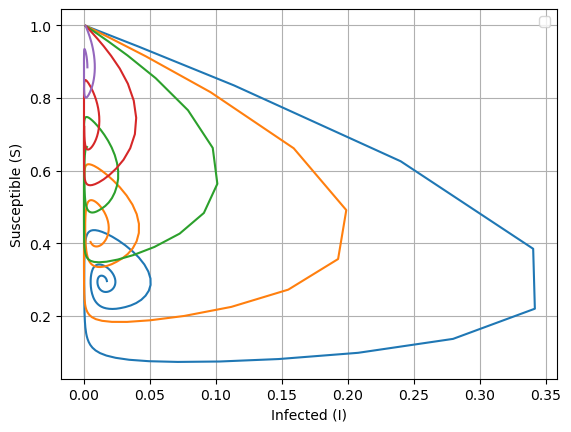

In [59]:
fig, axs = plt.subplots()
# axs = axs.ravel()

sol = solve_ivp(SIR_demographic_death, (0, days), y, args=(beta, gamma, mu, nu), dense_output=True)
S, I, R, D = sol.sol(t_span)

# Phase plots
initial_condition_S = []
initial_condition_I = []
end_condition_S = []
end_condition_I = []
for death_rate in np.linspace(0.01, 1, 5):
    sol_phase = solve_ivp(SIR_demographic_death, (0, days), y, args=(beta, gamma, mu, death_rate), dense_output=True)
    S_phase, I_phase, R_phase, D_phase = sol_phase.sol(t_span)
    axs.plot(I_phase, S_phase)
    
    initial_condition_S.append(S_phase[0])
    initial_condition_I.append(I_phase[0])

# axs.plot(initial_condition_S, initial_condition_I, 'k--', color='black', marker='o')
# axs.plot(end_condition_S, end_condition_I, 'k--', color='black', marker='o')
axs.set_xlabel("Infected (I)")
axs.set_ylabel("Susceptible (S)")
ax.set_title(f'SIR Model: β={beta}, γ={gamma}, μ={mu}, ν={nu}, $R_0={round(beta/gamma,2)}$')
axs.legend()
axs.grid(True)

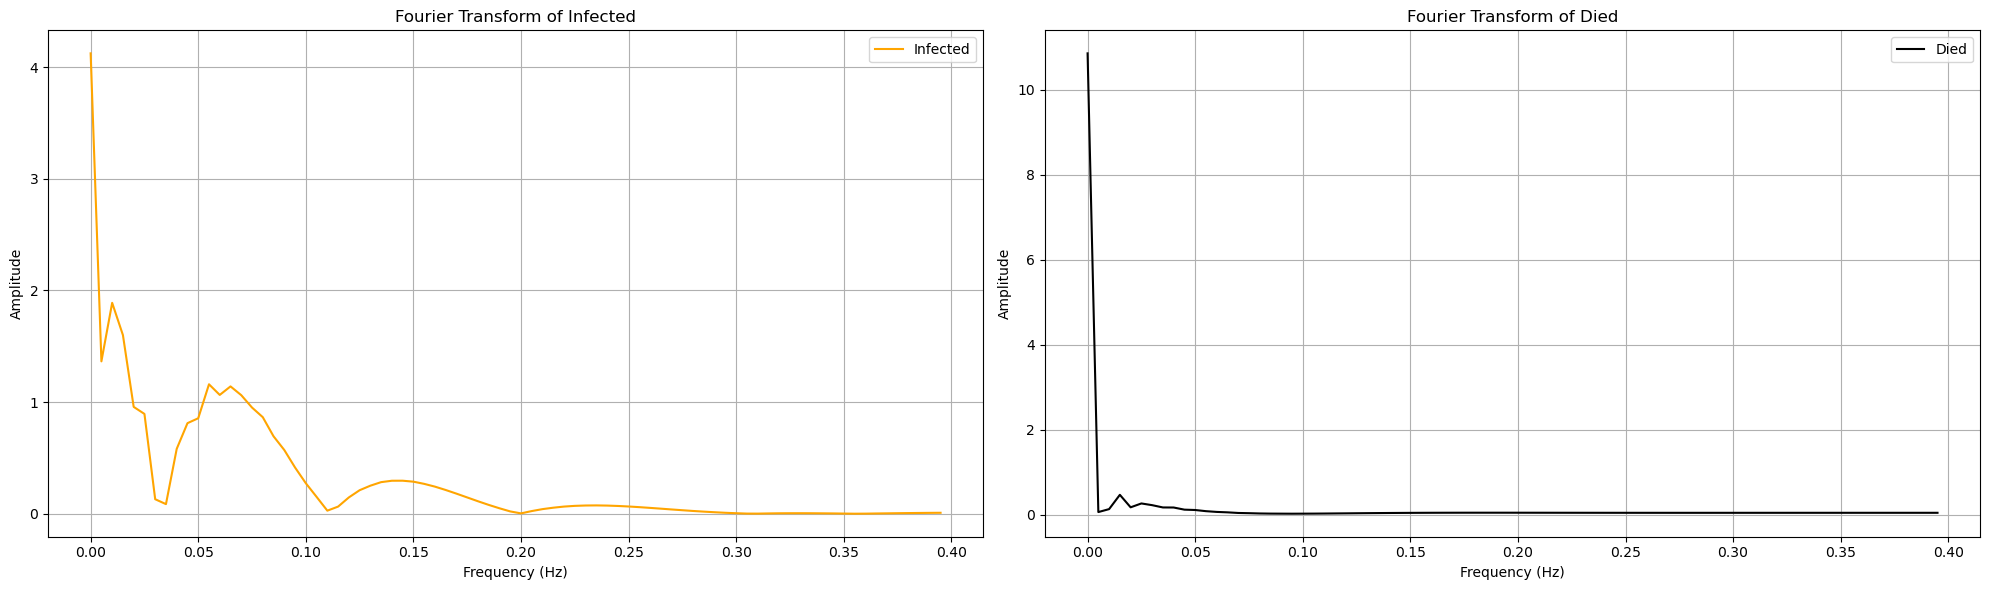

In [60]:
def fourier(ax, data, name, x_max=0.4):
    compartment, colour = data
    fourier = fftpack.fft(compartment)
    freqs = fftpack.fftfreq(len(compartment))


    freqs, fourier = zip(*sorted(zip(freqs, fourier)))
    i_min = freqs.index(0)
    i_max = freqs.index(x_max)

    ax.plot(freqs[i_min:i_max], np.abs(np.real(fourier))[i_min:i_max], label=f'{name}', color=colour)
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitude')
    ax.set_title(f'Fourier Transform of {name}')
    ax.grid(True)
    ax.legend(loc='upper right')

data_list = {
    # "Susceptible": (S, "blue"), 
    "Infected": (I, "orange"), 
    # "Recovered": (R, "green"), 
    "Died": (D, "black")}
n_plots = len(data_list)

fig, axs = plt.subplots(1, n_plots, figsize=(20, 6))

for ax, (key, compartment) in zip(axs, data_list.items()):
    fourier(ax, compartment, name=key)

plt.tight_layout()
plt.show()

-----------

$$
\begin{align}
\frac{{{\mathrm{d}}S}}{{{\mathrm{d}}t}} = \underbrace {\mu N}_{{\mathrm{birth}}} - \underbrace {\beta IS/N}_{{\mathrm{infection}}} + \underbrace {\omega R}_{{\mathrm{lost}}\,{\mathrm{immunity}}} - \underbrace {\mu S}_{{\mathrm{death}}} \\

\frac{{{\mathrm{d}}E}}{{{\mathrm{d}}t}} = \underbrace {\beta IS/N}_{{\mathrm{infection}}} - \underbrace {\sigma E}_{{\mathrm{latency}}} - \underbrace {\mu E}_{{\mathrm{death}}} \\


\frac{{{\mathrm{d}}I}}{{{\mathrm{d}}t}} = \underbrace {\sigma E}_{{\mathrm{latency}}} - \underbrace {\gamma I}_{{\mathrm{recovery}}} - \underbrace {\left( {\mu + \alpha } \right)I}_{{\mathrm{death}}} \\

\frac{{{\mathrm{d}}R}}{{{\mathrm{d}}t}} = \underbrace {\gamma I}_{{\mathrm{recovery}}} - \underbrace {\omega R}_{{\mathrm{lost}}\ {\mathrm{immunity}}} - \underbrace {\mu R}_{{\mathrm{death}}}

\end{align}
$$

In [61]:
def SEIRS(t, Z, beta, gamma, sigma, omega, alpha, mu):
    S, E, I, R = Z
    season_beta = (1 + beta * 2 * np.cos(2 * np.pi * t) + 1) / 2
    # print(f"season: {season_beta}, beta:{beta}")
    dS = mu - season_beta * I * S + omega * R - mu * S
    dE = season_beta * I * S - sigma * E - mu * E
    dI = sigma * E - gamma * I - (mu + alpha) * I
    dR = gamma * I - omega * R - mu * R
    return [dS, dE, dI, dR]

In [62]:
beta = Fraction(1, 3) # rate of infection
gamma = Fraction(1, 14) # rate of recovery
sigma = Fraction(1, 4) # latency
omega = Fraction(1, 100) # lost immunity
alpha = Fraction(1, 100) # infectious mortality
mu = Fraction(1, 76) # mortality

#beta = 2.5 # rate of infection
#gamma = 0.07 # rate of recovery
#sigma = 0.3 # latency
#omega = 0.7 # lost immunity
#alpha = 0.01 # infectious mortality
#mu = 0.04 # mortality

I0 = 0.001
R0 = 0.0
E0 = 0.0
S0 = 0.999
y0 = [S0, E0, I0, R0]

In [63]:
R_0 = float(round((omega / (omega + alpha)) * (beta / (gamma + mu + alpha)), 2))

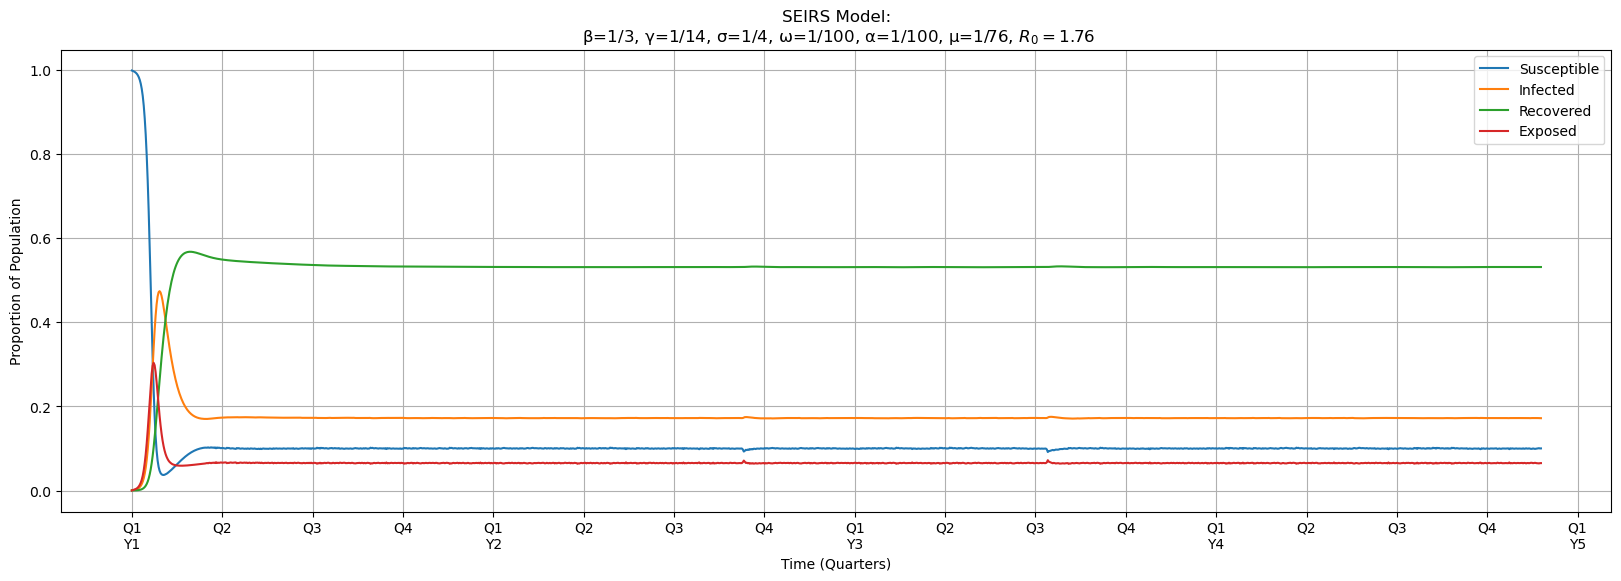

In [64]:
YEARS = 4
DAYS = 356
days = YEARS * DAYS
t_span = np.arange(0,days)
sol = solve_ivp(SEIRS, (0, days), y0, args=(beta, gamma, sigma, omega, alpha, mu), dense_output=True)
S, E, I, R = sol.sol(t_span)

fig, ax = plt.subplots(figsize=(20, 6))

ax.plot(t_span, S, label='Susceptible')
ax.plot(t_span, I, label='Infected')
ax.plot(t_span, R, label='Recovered')
ax.plot(t_span, E, label='Exposed')

quarters = np.arange(0, YEARS * 4 + 1)
quarter_labels = [f"Q{q % 4 + 1}\nY{q // 4 + 1}" if q % 4 == 0 else f"Q{q % 4 + 1}" for q in quarters]
ax.set_xticks(quarters * 365 / 4)
ax.set_xticklabels(quarter_labels)

ax.set_xlabel('Time (Quarters)')
ax.set_ylabel('Proportion of Population')
ax.set_title(f'SEIRS Model:\n β={beta}, γ={gamma}, σ={sigma}, ω={omega}, α={alpha}, μ={mu}, $R_0={R_0}$')
ax.legend()
ax.grid()

plt.show()

---------

ValueError: tuple.index(x): x not in tuple

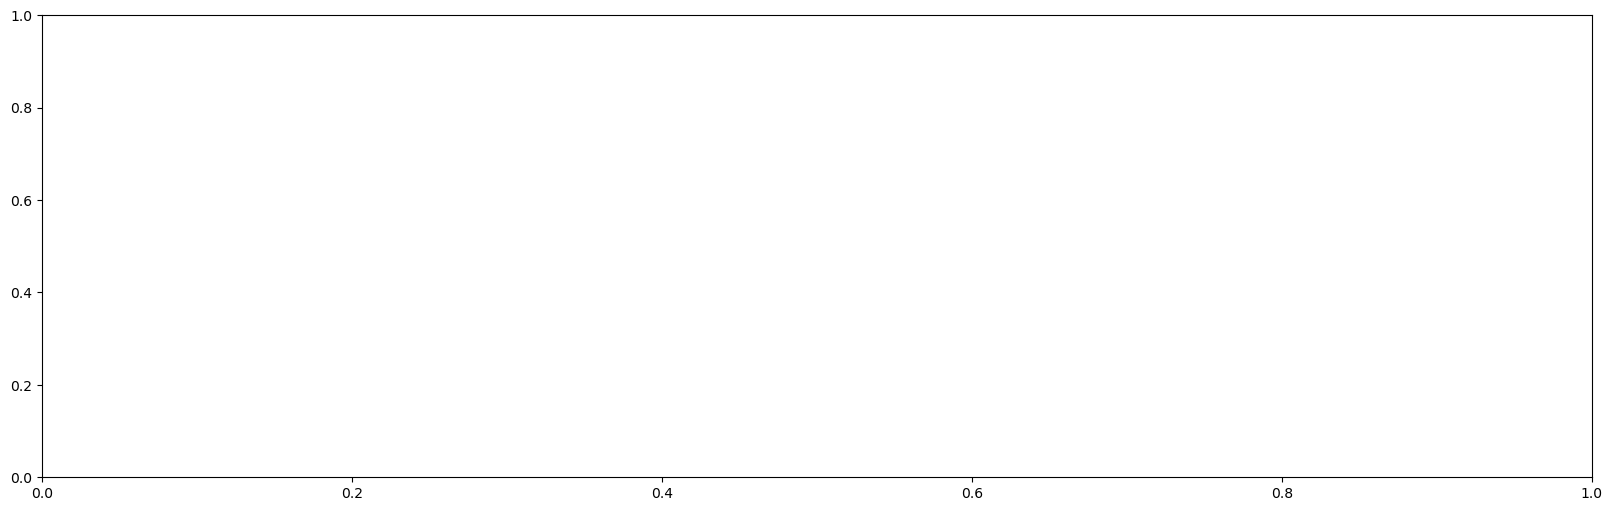

In [65]:
def fourier(ax, data, name, x_max=0.4):
    compartment, colour = data
    fourier = fftpack.fft(compartment)
    freqs = fftpack.fftfreq(len(compartment))


    freqs, fourier = zip(*sorted(zip(freqs, fourier)))
    i_min = freqs.index(0)
    i_max = freqs.index(x_max)

    ax.plot(freqs[i_min:i_max], np.abs(np.real(fourier))[i_min:i_max], label=f'{name}', color=colour)
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitude')
    ax.set_title(f'Fourier Transform of {name}')
    ax.grid(True)
    ax.legend(loc='upper right')
    
n_plots = len(data_list)
fig, axs = plt.subplots(1, 1, figsize=(20, 6))

fourier(ax, (I, "orange"), name="Infected")

plt.tight_layout()
plt.show()